In [1]:
# Autometic system that creat what is cost of medical insorence of persion will be.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
insurance_dataset=pd.read_csv("./insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape   #number of row and columans

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features:
.Sex
.Smoker
.Region

In [7]:
insurance_dataset.isnull().sum()   #checking missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\91933\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


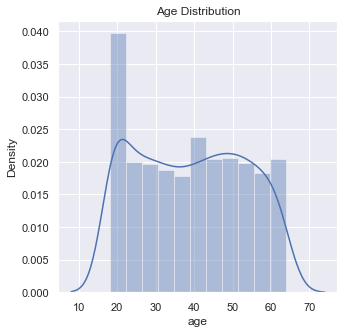

In [9]:
#Distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

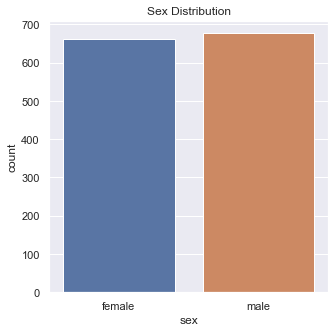

In [10]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\91933\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


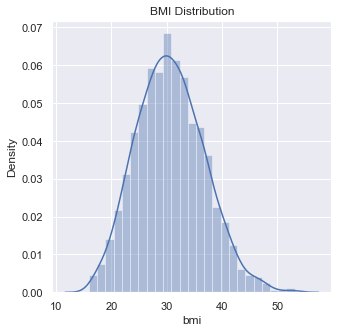

In [12]:
# bmi distribution     use for know persion is underwaight overwaight or fit 
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()     

Normal BMI range = 18.5 to 24.9

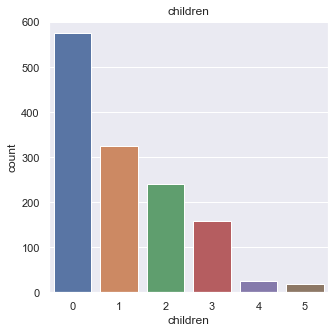

In [13]:
#chlideen columan
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

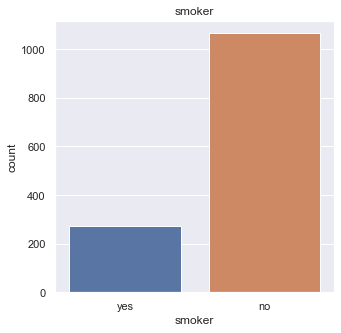

In [15]:
# smoker colums
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

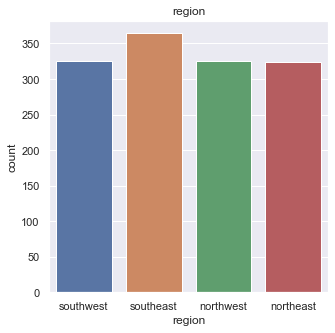

In [17]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\91933\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


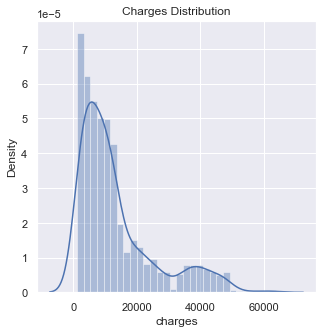

In [19]:
# distribution of charges value
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Encoding the categorical features

In [20]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [21]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# spliting the Features and Targate   

In [22]:
X=insurance_dataset.drop(columns='charges', axis=1)   #axix=1 columan, axis=0 row
Y=insurance_dataset['charges']

In [23]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


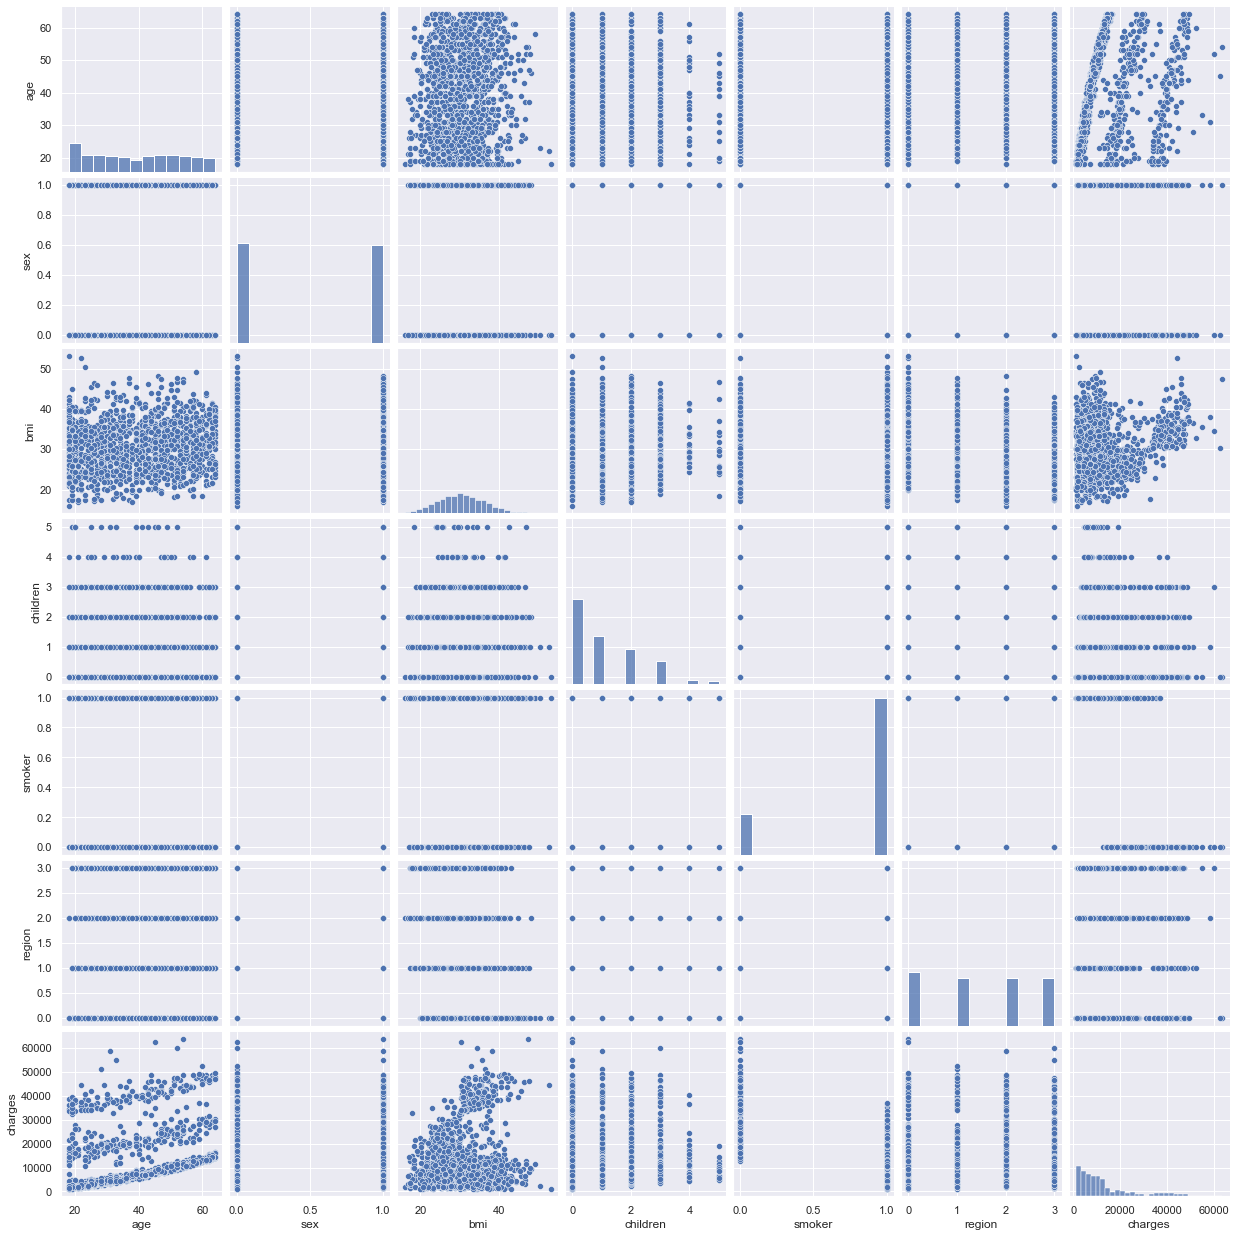

In [27]:
df = insurance_dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

sns.pairplot(df, kind="scatter")
plt.show()

# Correlation

A correlation coefficient is a statistical relationship between two numerical variables. It ranges from -1 to 1.
-1 denotes negative correlation and +1 denotes positive correlation.


In [28]:
np.corrcoef(insurance_dataset['bmi'],
insurance_dataset['charges'])[0][1]

0.1983409688336289

<AxesSubplot:>

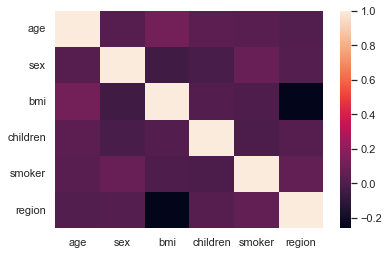

In [29]:
corr=insurance_dataset.select_dtypes("number").drop(
    columns=["charges"]).corr()
sns.heatmap(corr)

# Data Visualization

Data Visualization
It is always a good idea to visualize the data before building the model. Let's plot a scatter plot of the relationship between the 'BMI' (Body mass index) and 'charges' (price charged) variables.

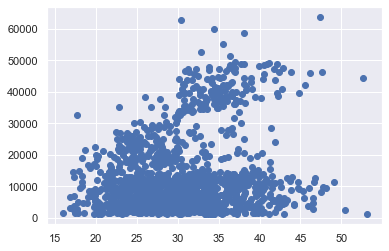

In [30]:
plt.scatter(insurance_dataset['bmi'],insurance_dataset['charges'])

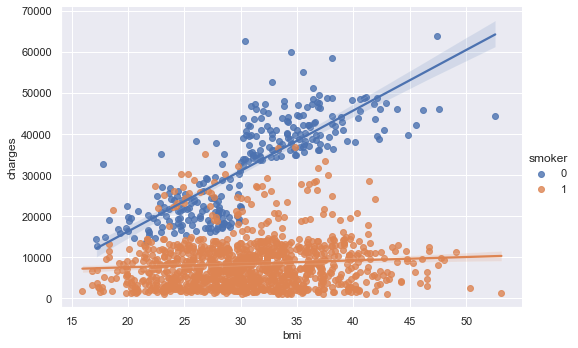

In [31]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=insurance_dataset,aspect=1.5,height=5)

# Model training

In [32]:
# x axis= Fetures, y axis= Target

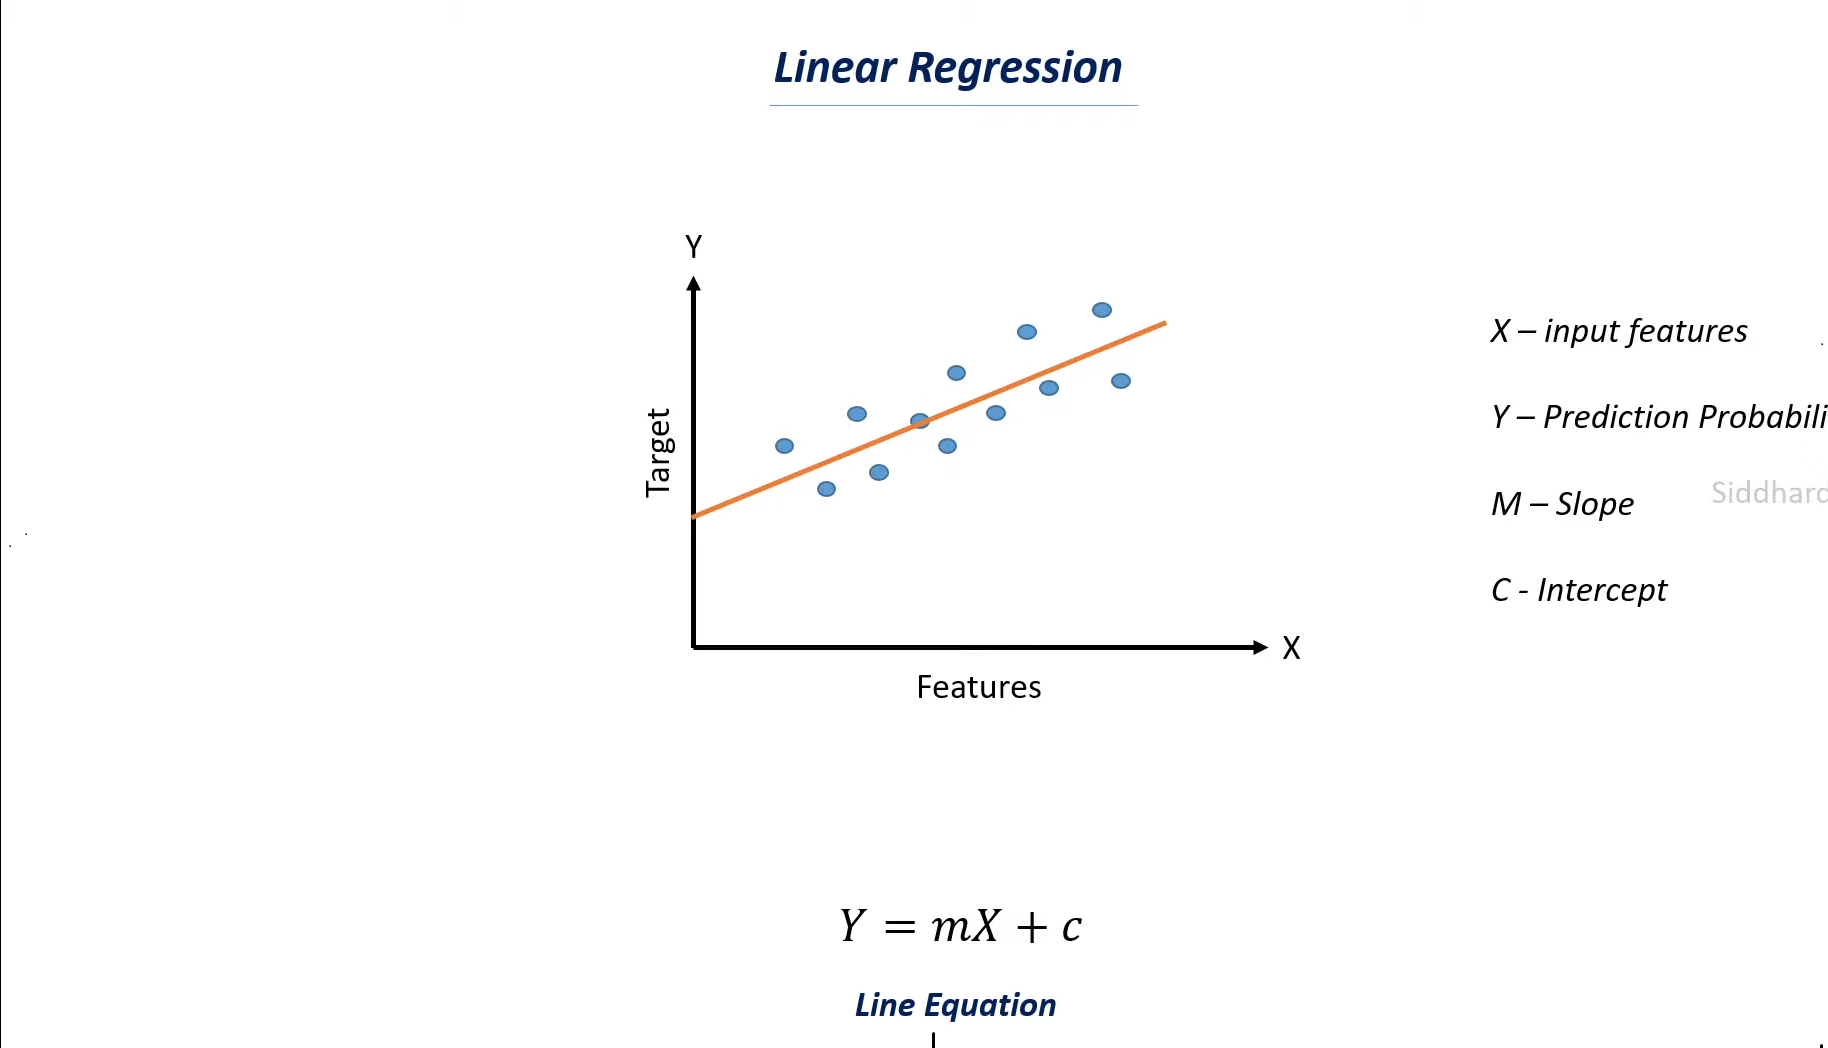

In [33]:
from IPython import display
display.Image("Screenshot (225).png")

In [34]:
# loading the Linear Regression model
regressor = LinearRegression()

In [35]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [36]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [37]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [38]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [39]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [40]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


# Using RandomForestRegressor for good accuracy

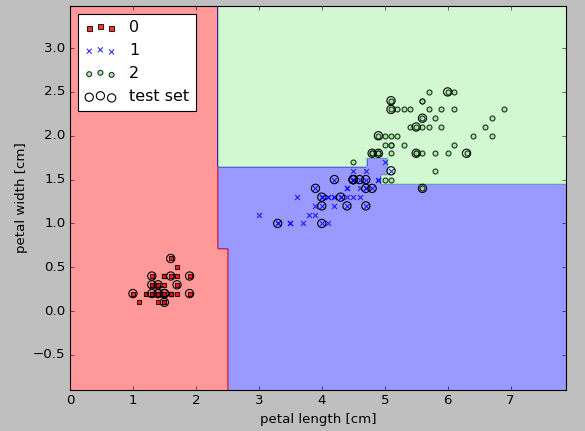

In [41]:
from IPython import display
display.Image("./RandomForests.png")  #Thoi only for understanding of Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor( n_estimators=200,max_depth=4)
clf.fit(X_train, Y_train)

# prediction on training data
training_data_prediction1 =clf.predict(X_train)

In [43]:
# prediction on test data
test_data_prediction1 =clf.predict(X_test)

In [44]:
# prediction on test data
test_data_prediction1 =clf.predict(X_test)

In [45]:
# R squared value
r2_test1 = metrics.r2_score(Y_test, test_data_prediction1)
print('R squared vale : ', r2_test1)

R squared vale :  0.8655801333267041


In [46]:
# finaly

In [47]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[4895.17667616]
The insurance cost is USD  4895.176676160349
